**필요한 패키지 설치**

In [1]:
# blocks output in Colab 💄
%%capture

! pip install datasets transformers

**Dataset 불러오기**

In [2]:
from datasets import load_dataset

ds = load_dataset('cats_vs_dogs')
ds

  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 23410
    })
})

**불러온 이미지 확인**

In [3]:
ex = ds['train'][100]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x268 at 0x7F9E85A8A440>,
 'labels': 0}

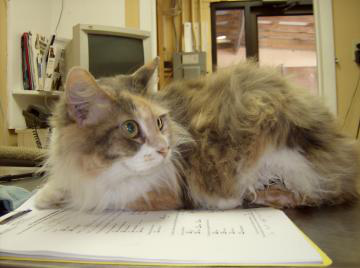

In [4]:
image = ex['image']
image

In [5]:
labels = ds['train'].features['labels']
labels

ClassLabel(names=['cat', 'dog'], id=None)

**이미지랑 라벨이 일치하는지 확인**

In [6]:
labels.int2str(ex['labels'])

'cat'

**ViT Feature Extractor 불러오기**


In [7]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


feature extractor 구성 print

In [8]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

**모델이 입력 데이터를 읽을 수 있게 이미지의 pixel이 포함된 dict 반환**

In [9]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.3804,  0.3725,  0.2784,  ...,  0.0824,  0.0667,  0.0588],
          [ 0.3804,  0.3725,  0.3020,  ...,  0.0824,  0.0667,  0.0588],
          [ 0.3804,  0.3804,  0.3412,  ...,  0.0902,  0.0745,  0.0667],
          ...,
          [-0.3255, -0.2784, -0.2392,  ..., -0.2784, -0.2784, -0.2706],
          [-0.4510, -0.4039, -0.3882,  ..., -0.2706, -0.2706, -0.2627],
          [-0.5137, -0.4902, -0.4824,  ..., -0.2471, -0.2392, -0.2314]],

         [[ 0.1686,  0.1843,  0.1059,  ..., -0.0902, -0.1059, -0.1137],
          [ 0.1686,  0.1843,  0.1294,  ..., -0.0902, -0.1059, -0.1137],
          [ 0.1686,  0.1922,  0.1686,  ..., -0.0824, -0.0980, -0.1059],
          ...,
          [-0.4431, -0.3961, -0.3569,  ..., -0.3804, -0.3804, -0.3725],
          [-0.6000, -0.5608, -0.5373,  ..., -0.3804, -0.3725, -0.3647],
          [-0.6706, -0.6471, -0.6392,  ..., -0.3569, -0.3490, -0.3412]],

         [[-0.3333, -0.3412, -0.4275,  ..., -0.5608, -0.5765, -0.5843],
          [-0

**Dataset 처리**

In [10]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [11]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[ 0.5922,  0.6078,  0.6314,  ...,  0.9137,  0.8902,  0.8745],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9137,  0.8980,  0.8824],
          [ 0.5922,  0.6078,  0.6314,  ...,  0.9059,  0.8980,  0.8824],
          ...,
          [ 0.2078,  0.2157,  0.2235,  ..., -0.9765, -0.9765, -0.9765],
          [ 0.2000,  0.2000,  0.2078,  ..., -0.9843, -0.9843, -0.9843],
          [ 0.1843,  0.1922,  0.2000,  ..., -0.9922, -0.9922, -0.9922]],

         [[ 0.2863,  0.3020,  0.3255,  ...,  0.5922,  0.5843,  0.5686],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6000,  0.5843,  0.5765],
          [ 0.2863,  0.3020,  0.3255,  ...,  0.6078,  0.5922,  0.5765],
          ...,
          [-0.0353, -0.0275, -0.0196,  ..., -0.9765, -0.9765, -0.9765],
          [-0.0431, -0.0431, -0.0353,  ..., -0.9843, -0.9843, -0.9843],
          [-0.0588, -0.0510, -0.0431,  ..., -0.9922, -0.9922, -0.9922]],

         [[-0.3176, -0.3020, -0.2784,  ..., -0.0510, -0.0431, -0.0510],
          [-0

**Data transform**

In [12]:
ds = load_dataset('beans')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

prepared_ds = ds.with_transform(transform)

  0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
prepared_ds = ds.with_transform(transform)

**Dataset을 dict형태로 변환**

In [14]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

**평가 metric 정의**

In [15]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-15-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


**pretrained model 불러오기**

In [16]:
from transformers import ViTForImageClassification

labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans-demo-v5",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=50,
  eval_steps=50,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [18]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=feature_extractor,
)

Training

In [19]:
train_results = trainer.train()
trainer.log_metrics("train", train_results.metrics)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
50,0.237600,0.157813,0.954887
100,0.114800,0.053083,0.984962
150,0.024200,0.091884,0.969925
200,0.013300,0.028418,0.992481
250,0.011600,0.038122,0.984962


***** train metrics *****
  epoch                    =         4.0
  total_flos               = 298497957GF
  train_loss               =      0.1263
  train_runtime            =  0:02:47.87
  train_samples_per_second =      24.637
  train_steps_per_second   =       1.549


In [20]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9925
  eval_loss               =     0.0284
  eval_runtime            = 0:00:02.70
  eval_samples_per_second =     49.137
  eval_steps_per_second   =      6.281
